In [21]:
# VLE calculation for Methyl acetate(1)/Methanol(2) binary mixture using Bubble-P algorithm

import numpy as np
import math
import array as arr
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import statistics

In [22]:
def initialvalue():
    
    # STEP 1 : Input Presure and Y
    P = float(input("Enter the Pressure of system in KPa:"))
    P1 = P*0.01 # P in bar
    
    
    #Antoine constants for Methyl acetate from NIST webbook for range of T 274.91 TO 328.99K
    A1 = 4.20364               #7.065
    B1 = 1164.426              #1157.622
    C1 = -52.69                #219.724
    
    #Antione constant for Methanol (2) from NIST webbook
    if P1 > 0.0984 and P1 < 1.786511:
        A2 = 5.20409
        B2 = 1581.341
        C2 = -33.50
    elif P1 > 1.786511 and P1 <74.7027:
        A2 = 5.15853
        B2 = 1569.613
        C2 = -34.846
        
        
    #T1sat = (B1/(A1-math.log10(P))) - C1
    #T2sat = ((B2)/(A1-math.log10(P))) - C2
    
    
    Phi_1 = 1
    Phi_2 = 1
    Pcf_1 = 1
    Pcf_2 = 1
    gamma1 = 1
    gamma2 = 1
    
    #molar volume of saturated solution
    
    V1_L = 8.36833/100000 #m3 per mole from NIST webbook
    V2_L = 4.2817/100000 #m3 per mole from NIST webbook 
    
    #critical constants for Methyl acetate (1) from 5.alvarez paper
    
    Tc_1 = 506.6 # K from Paper
    Pc_1 = 4750000 # Pa from paper
    Vc_1 = 0.00022758 # m3 per mole from NIST webbook
    
    #Critical constants for Methanol (2) from NIST webbook 
    
    Tc_2 = 513 # K from NIST webbook  
    Pc_2 = 8100000 # Pa from NIST webbook
    Vc_2 = 0.000113024 # m3 per mole from NIST webbook
    
    print("Select the Equation of State to be used:")
    print("\nEnter 1 for Van der Waals Equation of State")
    print("Enter 2 for Redlich - Kwong Equation of State")
    print("Enter 3 for Redlich - Kwong- Soave Equation of State")
    print("Enter 4 for Peng - Robinson Equation of State")
    eos = int(input("\nEnter the number corresponding to the Equation of State which is to be used:"))
    
    print("\nEnter mixing rule:")
    print("\nEnter 1 for arithmatic, Geometric and Berthelot mixing rule for Van der Waals or Redlich - Kwong Equation of State")
    print("Enter 2 for normal mixing rule for Redlich - Kwong- Soave or Peng - Robinson Equation of State  ")
    print("Enter 3 for mixing rule proposed by Huron and Vidal 1979")
    print("Enter 4 for mixing rule proposed by Panagiotopoulos et.al.1986")
    mix = int(input("\nEnter the number corresponding to the mixing rule to be used:"))
    
    print("\nEnter activity coefficient model:")
    print("\nEnter 1 for activity coefficients calculation by 3 Suffix Margulus equation:")
    print("Enter 2 for activity coefficients calculation by Van Laar equation:")
    print("Enter 3 for activity coefficients calculation by Wilson equation:")
    print("Enter 4 for activity coefficients calculation by NRTL equation:")
    print("Enter constants of activity coefficient model")
    case = int(input("\nEnter the number corresponding to the activity coefficient calculation model:"))
    
    #Y1 = []
#    Y2 = arr.array('f',[])
    
          
    Y1 =[0.027,0.145,0.186,0.240,0.242,0.269,0.272,0.306,0.309,0.332,0.373,0.391,0.438,0.462,0.486,0.505,0.516,0.545,
        0.557,0.582,0.599,0.609,0.658,0.66,0.68,0.693,0.707,0.721,0.757,0.837,0.881,0.965]
    Y2 = []
    for i in range(len(Y1)):
        y2 = 1 - Y1[i]
        Y2.append(y2)
          
    #n = int(input("Enter number of elments : "))
    #for i in range(0,n):
        #y1 = float(input())
        #Y1.append(y1)
        #y2 = 1-y1
        #Y2.append(y2)
    print("Length of Vector Y1 is :",len(Y1))
    
    return(Y1,Y2,Phi_1,Phi_2,Pcf_1,Pcf_2,gamma1,gamma2,A1,B1,C1,A2,B2,C2,P,V1_L,V2_L,eos,mix,case,Tc_1,Pc_1,Tc_2,Pc_2)


        

In [23]:
def EOS (Tc_1,Pc_1,Tc_2,Pc_2,T,eos):
    
    # Finding EOS constants
    
    if eos == 1:
        a1 = (27*8.314*8.314*Tc_1*Tc_1)/(64*Pc_1)
        b1 = (8.314*Tc_1)/(8*Pc_1)
        a2 = (27*8.314*8.314*Tc_2*Tc_2)/(64*Pc_2)
        b2 = (8.314*Tc_2)/(8*Pc_2)
        omega_eos_1 = 1
        alpha_eos_1 = 1
        omega_eos_2 = 1
        alpha_eos_2 = 1
    elif eos == 2:
        sigmaa = 1/(9*((2**0.3333)-1))
        sigmab = ((2**0.3333)-1) / 3
        a1 = (sigmaa*8.314*8.314*(Tc_1**2.5))/(Pc_1)
        b1 = (sigmab*8.314*Tc_1)/(Pc_1)
        a2 = (sigmaa*8.314*8.314*(Tc_2**2.5))/(Pc_2)
        b2 = (sigmab*8.314*Tc_2)/(Pc_2)
        omega_eos_1 = 1
        alpha_eos_1 = 1
        omega_eos_2 = 1
        alpha_eos_2 = 1
    elif eos ==3:
        a1 = (0.42747*8.314*8.314*Tc_1*Tc_1)/Pc_1
        b1 = (0.08664*8.314*Tc_1)/Pc_1
        a2 = (0.42747*8.314*8.314*Tc_2*Tc_2)/Pc_2
        b2 = (0.08664*8.314*Tc_2)/Pc_2
        
        temperature_1 = 0.7*Tc_1
        Pr_sat_1 = ((10**(A1-(B1/(temperature_1+C1))))*100000)/(Pc_1)
        omega_eos_1 = -1-np.log10(Pr_sat_1)
        m_1 = 0.48508+(1.55171*omega_eos_1)-(0.15613*omega_eos_1*omega_eos_1)
        n_1 = (1-((T/Tc_1)**0.5))
        alpha_eos_1 = (1+(m_1*n_1))**2
        
        temperature_2 = 0.7*Tc_2
        Pr_sat_2 = ((10**(A2-(B2/(temperature_2+C2))))*100000)/(Pc_2)
        omega_eos_2 = -1-np.log10(Pr_sat_2)
        m_2 = 0.48508+(1.55171*omega_eos_2)-(0.15613*omega_eos_2*omega_eos_2)
        n_2 = (1-((T/Tc_2)**0.5))
        alpha_eos_2 = (1+(m_2*n_2))**2
    elif eos ==4:
        a1 = (0.45724*8.314*8.314*Tc_1*Tc_1)/(Pc_1)
        b1 = (0.07780*8.314*Tc_1)/(Pc_1)
        a2 = (0.45724*8.314*8.314*Tc_2*Tc_2)/(Pc_2)
        b2 = (0.07780*8.314*Tc_2)/(Pc_2)
        
        temperature_1 = 0.7*Tc_1
        Pr_sat_1 = ((10**(A1-(B1/(temperature_1+C1))))*100000)/Pc_1
        omega_eos_1 = -1-np.log10(Pr_sat_1)
        m_1 = 0.37464+(1.54226*omega_eos_1)-(0.26992*omega_eos_1*omega_eos_1)
        n_1 = (1-((T/Tc_1)**0.5))
        alpha_eos_1 = (1+(m_1*n_1))**2
        
        temperature_2 = 0.7*Tc_2
        Pr_sat_2 = ((10**(A2-(B2/(temperature_2+C2))))*100000)/Pc_2
        omega_eos_2 = -1-np.log10(Pr_sat_2)
        m_2 = 0.37464+(1.54226*omega_eos_2)-(0.26992*omega_eos_2*omega_eos_2)
        n_2 = (1-((T/Tc_2)**0.5))
        alpha_eos_2 = (1+(m_2*n_2))**2
    else: 
        print("Using default Vander waals Equation of State")
        a1 = (27*8.314*8.314*Tc_1*Tc_1)/(64*Pc_1)
        b1 = (8.314*Tc_1)/(8*Pc_1)
        a2 = (27*8.314*8.314*Tc_2*Tc_2)/(64*Pc_2)
        b2 = (8.314*Tc_2)/(8*Pc_2) 
        omega_eos_1 = 1
        alpha_eos_1 = 1
        omega_eos_2 = 1
        alpha_eos_2 = 1
    
    return(a1,b1,a2,b2,omega_eos_1,alpha_eos_1,omega_eos_2,alpha_eos_2)
    

In [24]:
def mixingrule (a1,b1,a2,b2,y1,y2,eos,alpha_eos_1,alpha_eos_2,mix,T):
    
    if mix == 1:
        b12 = 0.5*(b1+b2)
        a12 = (a1*a2)**0.5
        bmix = (y1*y1*b1) + (y2*y2*b2) + (2*y1*y2*b12)
        amix = (y1*y1*a1) + (y2*y2*a2) + (2*y1*y2*a12)
    #   print("Value of amix in function is : ",amix)
    #   print("Value of bmix in function is : ", bmix)
        return (amix,bmix,a12,b12)
    elif mix == 2:
        a12 = (a1*alpha_eos_1*a2*alpha_eos_2)**0.5
        b12 = 0.5*(b1+b2)
        amix = (y1*y1*a1*alpha_eos_1) + (y2*y2*a2*alpha_eos_2) + (2*y1*y2*a12)
        bmix = (y1*b1) + (y2*b2)
        return(amix,bmix,a12,b12)
    elif mix == 3:
        a12 = (a1*alpha_eos_1*a2*alpha_eos_2)**0.5
        b12 = 0.5*(b1+b2) 
        A1 = ((y1 * a1) / b1) + ((y2 * a2) / b1)
        A2 = ((y1 * y1 *a1) + (2 * y1 * y2 * a12) + (y2 * y2 *a2)) / ((y1 * y1 * b1) + (2 * y1 * y2 * b12) + (y2 * y2 *b2))
        A_E_Inf = A1 - A2
        kij = 0.21
        p11 = b1 - ((a1)/(8.314*T))
        p22 = b2 - ((a2)/(8.314*T))
        p12 = (p11 + p22) * 0.5 * (1-0.21)
        bmix = ((y1 * y1 * p11) + (2*y1*y2*p12) + (y2*y2*p22)) / ((1) + ((A_E_Inf)/(8.314*T)) - ((y1*a1)/(b1*8.314*T)) - ((y2*a2)/(b2*8.314*T)))
        amix = bmix * (((y1*a1)/b1) + ((y2*a2)/b2) - A_E_Inf)
        return(amix,bmix,a12,b12)
    elif mix == 4:
        k12 = 0.21
        k21 = 0.50
        a12 = ((a1*a2)**0.5) * ((1-k12) + ((k12 - k21) * y1))
        a21 = ((a1*a2)**0.5) * ((1-k21) + ((k21 - k12) * y2))
        amix = (y1*y1*a1) + (y2*y2*a2) + ((y1*y2) * (a12 + a21))
        b12 = (b1 + b2) * 0.5
        bmix = (y1 * b1) + (y2 * b2)
        return(amix,bmix,a12,b12)

        

# a,b = mixingruke (1,1,1,1,1,1)
# print (a,b)

    

In [25]:
def activity_model_input(case):
    if case == 1: 
        # taken from tu1997 paper as no value given in 5.alvarez paper
        A12 = 0.81157
        A21 = 0.93946
        alpha = 0.27101 
        #print("case is :",case)
        
    #elif case == 2:
        # Van Laar coefficients not found
        #A12 =  
        #A21 = 
        #alpha = 
        #print("case is :",case)
        
    elif case == 3:
        # Wilson from paper no 5.alvarez
        A12 = -75.011 
        A21 = 3815.635
        alpha = 0.534
        #print("case is :",case)

        # Wilson from tu1997 paper
#      A12 = -116.30 
 #     A21 = 451.90
 #     alpha = 0.27101
#      print("case is :",case)

    elif case == 4:
        # NRTL from 5.Alvarez paper
        A12 = 1927.705
        A21 = 1181.491
        alpha = 0.534
        
        #NRTL from Tu1997 paper
#        A12 = 224.99
#        A21 = 86.237
#        alpha = 0.27101
#        print("case is :",case)
    else:
        print("Using default of 3- Suffix Margulus equation")
        # Margulus from Tu1997 paper
        A12 = 0.81157
        A21 = 0.93946
        alpha = 0.27101
        print("case is :",case)
    
    return(A12,A21,alpha)
    

In [26]:
def Tcal (A,B,C,P):
    Tsat = ((B)/(A-math.log10((P*0.00001)))) - C #converting Pressure from Pa to bar
    return(Tsat)
    

In [27]:
def initial_guess (y1,y2,T1sat,T2sat):
    # Calculation initial guess of Temperature
    T_initial =(y1*T1sat) + (y2*T2sat)
    return(T_initial)

    

In [28]:
def Psatcal (A,B,C,T):
    P = 10**(A-((B)/(T+C)))
    P = P*100000 #Converting Pressure from bar to Pa
    return(P)

In [29]:
def volumecal (a,b,P,T,eos,aplha_eos):
    Delv = 1
    Vold = (8.314*T)/(P) #initial guess
    if eos == 1:    
        while Delv > 0.001:
            Vnew = ((8.314*T)/(P+(a/(Vold*Vold))))+b
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
    elif eos == 2:
        while Delv > 0.001:
            Vnew = b + ((8.314*T)/(P+(a/(Vold*(Vold+b)*(T**0.5)))))
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
    elif eos == 3:
        while Delv > 0.001:
            Vnew = b + ((8.314*T)/(P+(a/(Vold*(Vold+b)))))
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
    elif eos == 4:
        while Delv > 0.001:
            Vnew = b + ((8.314*T)/(P+(a/((Vold*Vold)+(2*b*Vold)-(b*b)))))
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
#V = volumecal(2,3,10,325.15)
#print("Volume is :",V)

In [30]:
def PCF (P,P1sat,P2sat,V1_L,V2_L,T):
    Pcf_1 = math.exp(((P-P1sat)*V1_L)/(8.314*T))
    Pcf_2 = math.exp(((P-P2sat)*V2_L)/(8.314*T))
#    print("Value of Pcf_1 in function is :",Pcf_1)
#    print("Value of Pcf_2 in function is :",Pcf_2)
    return (Pcf_1,Pcf_2)
#Pcf_1,Pcf_2 = PCF(10,12,14,0.25,0.254,325)
#print (Pcf_1,Pcf_2)

In [31]:
def Zcal (Psat,Vsat,T):
    Z = (Psat*Vsat)/(8.314*T)
    #print("Value of Z in funtion is :",Z)
    return Z
#Z = Zcal(10,10,320)
#print(Z)

In [32]:
def phisatcal (Z1,Z2,a1,b1,a2,b2,V1sat,V2sat,T,eos,alpha_eos_1,alpha_eos_2):
    if eos == 1:
        Ln_phi_1_sat = (-1)*(math.log(1-(b1/V1sat))+(a1/(V1sat*8.314*T))+(math.log(Z1))+(1-Z1))
       # print("Ln_phi_1_sat",Ln_phi_1_sat)
        Ln_phi_2_sat = (-1)*(math.log(1-(b2/V1sat))+(a2/(V2sat*8.314*T))+(math.log(Z2))+(1-Z2))
        #print("Ln_phi_2_sat",Ln_phi_2_sat)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        #print("Phi_1_sat",Phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        #print("Phi_2_sat",Phi_2_sat)
        #print("Value of Phi_1_sat in function is :",Phi_1_sat)
        #print("Value of Phi_2_sat in function is :",Phi_2_sat)
        return (Phi_1_sat,Phi_2_sat)
    elif eos == 2:
        Ln_phi_1_sat = (-1)*(1+(a1/(b1*8.314*(T**1.5))))*(math.log(1-(b1/V1sat))) - math.log(Z1) + (Z1-1)
        Ln_phi_2_sat = (-1)*(1+(a2/(b2*8.314*(T**1.5))))*(math.log(1-(b2/V2sat))) - math.log(Z2) + (Z2-1)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
       
        return (Phi_1_sat,Phi_2_sat)
    elif eos == 3:
        Ln_phi_1_sat = (-1)*(1+((a1*alpha_eos_1)/(b1*8.314*T)))*(math.log(1-(b1/V1sat)))-math.log(Z1)+(Z1-1)
        Ln_phi_2_sat = (-1)*(1+((a2*alpha_eos_2)/(b2*8.314*T)))*(math.log(1-(b2/V2sat)))-math.log(Z2)+(Z2-1)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        #print("Value of Phi_1_sat in function is :",Phi_1_sat)
        #print("Value of Phi_2_sat in function is :",Phi_2_sat)
        return (Phi_1_sat,Phi_2_sat)
    elif eos ==4:
        Ln_phi_1_sat = (-1)*(math.log(1-(b1/V1sat))) - ((a1*alpha_eos_1)/(2*1.414*8.314*b1*T))*math.log(abs(((2.414*b1)+V1sat)/((0.414*b1)-V1sat))) - math.log(Z1) + (Z1-1)
        Ln_phi_2_sat = (-1)*(math.log(1-(b2/V2sat))) - ((a2*alpha_eos_2)/(2*1.414*8.314*b2*T))*math.log(abs(((2.414*b2)+V2sat)/((0.414*b2)-V2sat))) - math.log(Z2) + (Z2-1)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        #print("Value of Phi_1_sat in function is :",Phi_1_sat)
        #print("Value of Phi_2_sat in function is :",Phi_2_sat)
        return(Phi_1_sat,Phi_2_sat)
    
                                                                                              
                                                                    
#phi1sat,phi2sat = phisatcal(1,1,0.5,0.4,0.2,0.54,14,15,320)
#print(phi1sat,phi2sat)

In [33]:
def P1satcal(y1,y2,Phi_1,Phi_2,Pcf_1,Pcf_2,gamma1,gamma2,P,phi1sat,phi2sat,Told,P1sat,P2sat):
    P1sat1 = ((y1*Phi_1*P)/(gamma1*phi1sat*Pcf_1)) + ((y2*Phi_2*P*P1sat)/(gamma2*phi2sat*Pcf_2*P2sat))
    return P1sat1

In [34]:
def Xcal (y1,y2,Phi_1,Phi_2,P,gamma1,gamma2,P1sat,P2sat,phi1sat,phi2sat,Pcf_1,Pcf_2):
    x1 = ((y1*Phi_1*P)/(gamma1*P1sat*phi1sat*Pcf_1))
    x2 = ((y2*Phi_2*P)/(gamma2*P2sat*phi2sat*Pcf_2))
    return(x1,x2)
    

In [35]:
def Phical (Vmix,bmix,a12,y1,y2,T,Pold,eos,a1,b1,a2,b2,a11,a22,amix): # here Pold = P an T = Tnew
    
    if eos == 1:
        ln_phi_1 = math.log(Vmix/(Vmix-bmix)) + (b1/(Vmix-bmix)) - math.log((Pold*Vmix)/(8.314*T)) - ((2*(y1*a1+y2*a12))/(Vmix*8.314*T))
        ln_phi_2 = math.log(Vmix/(Vmix-bmix)) + (b2/(Vmix-bmix)) - math.log((Pold*Vmix)/(8.314*T)) - ((2*(y1*a12+y2*a2))/(Vmix*8.314*T))
        phi_1 = math.exp(ln_phi_1)
        #print("Value of phi_1 in the function is :",phi_1)
        #print("Value of ln_phi_2 in the function is :",ln_phi_2)
        phi_2 = math.exp(ln_phi_2)
    #    print("Value of phi_1 in the function is :",phi_1)
    #    print("Value of phi_2 in the function is :",phi_2)
        return (phi_1,phi_2)
    
    elif eos == 2:
        zmix = (Pold*Vmix)/(8.314*T)
        ln_phi_1 = (b1/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b1)/(bmix)-2*((y1*a1)+(y2*a12)))
        ln_phi_2 = (b2/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b2)/(bmix)-2*((y1*a12)+(y2*a2)))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
        return(phi_1,phi_2)
    
    elif eos == 3:
        zmix = (Pold*Vmix)/(8.314*T)
        ln_phi_1 = (b1/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b1)/(bmix)-2*((y1*a11)+(y2*a12)))
        ln_phi_2 = (b2/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b2)/(bmix)-2*((y1*a12)+(y2*a22)))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
        return(phi_1,phi_2)
    
    elif eos == 4:
        zmix = (Pold*Vmix)/(8.314*T)
#        ln_phi_1 = 24
#        ln_phi_2 = 14
        ln_phi_1 = (b1/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((amix)/(2*1.414*bmix*8.314*T))*(math.log((Vmix+(2.414*bmix))/(Vmix-(0.414*bmix))))*((b1/bmix)-2*((y1*a11)+(y2*a12)))
        ln_phi_2 = (b2/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((amix)/(2*1.414*bmix*8.314*T))*(math.log((Vmix+(2.414*bmix))/(Vmix-(0.414*bmix))))*((b2/bmix)-2*((y1*a12)+(y2*a22)))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
        return(phi_1,phi_2)

In [36]:
def gammacal (x1,x2,A12,A21,case,alpha,V1_L,V2_L,T):
    if case == 1:
        gamma1 = math.exp(((x2**2)*(2*(A21-A12)*x1)) + A12)
        gamma2 = math.exp(((x1**2)*(2*(A12-A21)*x2)) + A21)
#    print("Value of gamma1 in function is :",gamma1)
#    print("Value of gamma2 in function is :",gamma2)
        #print("Valus of case inside the function is :",case)
        return (gamma1,gamma2)
    elif case == 2:
        A = ((A21*x2)/((A12*x1)+(A21*x2)))**2
        B = ((A12*x1)/((A12*x1)+(A21*x2)))**2
        gamma1 = math.exp(A12*A)
        gamma2 = math.exp(A21*B)
        #print("Valus of case inside the function is :",case)
        return (gamma1,gamma2)
    elif case == 3:
        G12 = (V2_L/V1_L)*(np.exp(-A12/(8.314*T)))
        G21 = (V1_L/V2_L)*(np.exp(-A21/(8.314*T)))
        D1 = (-1)*(np.log(x1+(G12*x2)))
        D2 = (G12)/(x1+(G12*x2))
        D3 = (G21)/(x2+(G21*x1))
        gamma1 = np.exp(D1+(x2*(D2-D3)))
        #print("gamma1 is clear with value of :",gamma1)
        E1 = (-1)*(np.log(x2+(G21*x1)))
        E2 = (G12)/(x1+(G12*x2))
        E3 = (G21)/(x2+(G21*x1))
        gamma2 = np.exp(E1+(x1*(E2-E3)))
#        gamma1 = math.exp((-1)*(math.log(x1+(x2*A12))) + (x2)*(((A12)/(x1+(x2*A12))) - ((A21)/(x2+(x1*A21)))))
 #       gama2 =  math.exp((-1)*(math.log(x2+(x1*A21))) + (x1)*(((A12)/(x1+(x2*A12))) - ((A21)/(x2+(x1*A21)))))
        #print("Valus of case inside the function is :",case)
        return (gamma1,gamma2)
    elif case == 4:
        G12 = np.exp((-1)*alpha*A12)
        G21 = np.exp((-1)*alpha*A21)
        A1 = ((G21)/(x1+(x2*G21)))**2
        A2 = G12/((x2+(x1*G12))**2)
        gamma1 = np.exp(x2*x2*((A21*A1) + (A12*A2)))
        B1 = ((G12)/(x2+(x1*G12)))**2
        B2 = (G21)/((x1+(x2*G21))**2)
        gamma2 = np.exp(x1*x1*((A12*B1) + (A21*B2)))
        #print("Values of case inside the function is :",case)
        return(gamma1,gamma2)
    else:
        gamma1 = math.exp(((x2**2)*(2*(A21-A12)*x1)) + A12)
        gamma2 = math.exp(((x1**2)*(2*(A12-A21)*x2)) + A21)
        print("Valus of case inside the function is :",case)
#    print("Value of gamma1 in function is :",gamma1)
#    print("Value of gamma2 in function is :",gamma2)
        return (gamma1,gamma2)

        
        
        

#gamma1,gamma2 = gammacal(0.5,0.5,-0.0487,-0.0492)
#print(gamma1,gamma2)

    

In [37]:
if __name__ == "__main__":

    Y1,Y2,Phi_1,Phi_2,Pcf_1,Pcf_2,gamma1,gamma2,A1,B1,C1,A2,B2,C2,P,V1_L,V2_L,eos,mix,case,Tc_1,Pc_1,Tc_2,Pc_2= initialvalue()
    X1 = arr.array('f',[])
    X2 = arr.array('f',[])
    P = P * 1000 # converting pressure from Kpa to Pa
    T1sat = Tcal(A1,B1,C1,P)
    T2sat = Tcal(A2,B2,C2,P)
    T = arr.array('f',[])

    for i in range(0,len(Y1)):
        T_initial = initial_guess(Y1[i],Y2[i],T1sat,T2sat)
        P1sat = Psatcal(A1,B1,C1,T_initial)
        P2sat = Psatcal(A2,B2,C2,T_initial)
        a1,b1,a2,b2,omega_eos_1,alpha_eos_1,omega_eos_2,alpha_eos_2 = EOS(Tc_1,Pc_1,Tc_2,Pc_2,T_initial,eos)
        amix,bmix,a12,b12 =mixingrule(a1,b1,a2,b2,Y1[i],Y2[i],eos,alpha_eos_1,alpha_eos_2,mix,T_initial)
        A12,A21,alpha = activity_model_input(case)
        a11 = a1*alpha_eos_1
        a22 = a2*alpha_eos_2
        V1sat = volumecal(a11,b1,P1sat,T_initial,eos,alpha_eos_1)
        V2sat = volumecal(a22,b2,P2sat,T_initial,eos,alpha_eos_2)
        Z1sat = Zcal(P1sat,V1sat,T_initial)
        Z2sat = Zcal(P2sat,V2sat,T_initial)
        phi1sat,phi2sat = phisatcal(Z1sat,Z2sat,a1,b1,a2,b2,V1sat,V2sat,T_initial,eos,alpha_eos_1,alpha_eos_2)
        Told = T_initial
        deltaT = 1
        while deltaT > 0.001:
            P1sat = P1satcal(Y1[i],Y2[i],Phi_1,Phi_2,Pcf_1,Pcf_2,gamma1,gamma2,P,phi1sat,phi2sat,Told,P1sat,P2sat)
            Tnew = Tcal(A1,B1,C1,P1sat)
            P1sat = Psatcal(A1,B1,C1,Tnew)
            P2sat = Psatcal(A2,B2,C2,Tnew)
            a1,b1,a2,b2,omega_eos_1,alpha_eos_1,omega_eos_2,alpha_eos_2 = EOS(Tc_1,Pc_1,Tc_2,Pc_2,Tnew,eos)
            amix,bmix,a12,b12 =mixingrule(a1,b1,a2,b2,Y1[i],Y2[i],eos,alpha_eos_1,alpha_eos_2,mix,Tnew)
            a11 = a1*alpha_eos_1
            a22 = a2*alpha_eos_2
            V1sat = volumecal(a11,b1,P1sat,Tnew,eos,alpha_eos_1)
            V2sat = volumecal(a22,b2,P2sat,Tnew,eos,alpha_eos_2)
            Z1sat = Zcal(P1sat,V1sat,Tnew)
            Z2sat = Zcal(P2sat,V2sat,Tnew)
            phi1sat,phi2sat = phisatcal(Z1sat,Z2sat,a1,b1,a2,b2,V1sat,V2sat,Tnew,eos,alpha_eos_1,alpha_eos_2)
            x1,x2 = Xcal (Y1[i],Y2[i],Phi_1,Phi_2,P,gamma1,gamma2,P1sat,P2sat,phi1sat,phi2sat,Pcf_1,Pcf_2)
            Vmix = volumecal(amix,bmix,P,Tnew,eos,alpha_eos_1)
            Phi_1,Phi_2 = Phical(Vmix,bmix,a12,Y1[i],Y2[i],Tnew,P,eos,a1,b1,a2,b2,a11,a22,amix)
            gamma1,gamma2 = gammacal(x1,x2,A12,A21,case,alpha,V1_L,V2_L,Tnew)
            #print(gamma1,gamma2)
            Pcf_1,Pcf_2 = PCF(P,P1sat,P2sat,V1_L,V2_L,Tnew)
            deltaT = abs(Tnew - Told)
            Told = Tnew
            Tk = Tnew - 273.15
        
        T.append(Tk)
        X1.append(x1)
        X2.append(x2)
    
    print("\nFinal values of T in K is :",T)
    print("\nCorresponding values of Y1 are :",Y1)
    print("\nFinal values of X1 are :",X1)
    print("\nFinal values of X2 are :",X2)
    print("omega1",omega_eos_1)
    print("omega2",omega_eos_2)


Enter the Pressure of system in KPa:313.15
Select the Equation of State to be used:

Enter 1 for Van der Waals Equation of State
Enter 2 for Redlich - Kwong Equation of State
Enter 3 for Redlich - Kwong- Soave Equation of State
Enter 4 for Peng - Robinson Equation of State

Enter the number corresponding to the Equation of State which is to be used:4

Enter mixing rule:

Enter 1 for arithmatic, Geometric and Berthelot mixing rule for Van der Waals or Redlich - Kwong Equation of State
Enter 2 for normal mixing rule for Redlich - Kwong- Soave or Peng - Robinson Equation of State  
Enter 3 for mixing rule proposed by Huron and Vidal 1979
Enter 4 for mixing rule proposed by Panagiotopoulos et.al.1986

Enter the number corresponding to the mixing rule to be used:4

Enter activity coefficient model:

Enter 1 for activity coefficients calculation by 3 Suffix Margulus equation:
Enter 2 for activity coefficients calculation by Van Laar equation:
Enter 3 for activity coefficients calculation by 

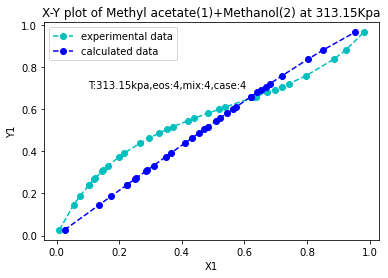

In [38]:
    import statistics
    os.getcwd()
    df=pd.read_csv('3rd-Mixture-x-y.csv')
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    
    df.plot( x = 'x', y = 'y',linestyle='--',marker ='o',color = 'c')
    plt.plot(X1,Y1,linestyle='--',marker ='o',color = 'b')
    plt.title('X-Y plot of Methyl acetate(1)+Methanol(2) at {}Kpa'.format(P/1000))
    plt.legend(["experimental data","calculated data"])
    plt.text(0.1,0.7,"T:{}kpa,eos:{},mix:{},case:{}".format(P/1000,eos,mix,case))
    plt.xlabel('X1')
    plt.ylabel('Y1')
    plt.savefig("X1-Y1-3rd-Mix,{},{},{},{}.PNG".format(P/1000,eos,mix,case))
    plt.show()

array('f', [239.24050903320312, 237.3466033935547, 236.67637634277344, 235.7931365966797, 235.7686004638672, 235.33631896972656, 235.28536987304688, 234.7537384033203, 234.70384216308594, 234.35446166992188, 233.7527618408203, 233.49864196777344, 232.86721801757812, 232.5912628173828, 232.3245849609375, 232.14718627929688, 232.04539489746094, 231.84652709960938, 231.78070068359375, 231.68638610839844, 231.66110229492188, 231.6637725830078, 231.84873962402344, 231.85842895507812, 232.0323944091797, 232.17227172851562, 232.33973693847656, 232.53465270996094, 233.1461181640625, 235.03271484375, 236.36489868164062, 239.54579162597656])


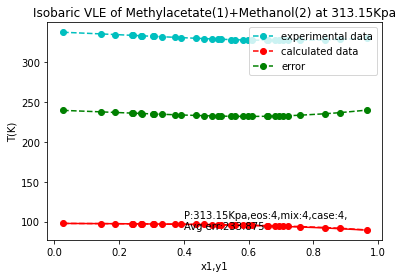

In [39]:
    os.getcwd()
    df=pd.read_csv('3rd-Mixture.csv')
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    error = arr.array('f',[])
    for i in range(0,len(Y1)):
        e = abs(T[i]-y[i])
        error.append(e)
    print(error)
    avg = round(statistics.mean(error),3)
    
   
    df.plot( x = 'x', y = 'y',linestyle='--',marker ='o',color = 'c')
    plt.plot(Y1,T,linestyle='--',marker ='o',color = 'r')
    plt.plot(Y1,error,linestyle='--',marker ='o',color = 'g')
    plt.plot(X1,T,color = 'r')
    plt.title('Isobaric VLE of Methylacetate(1)+Methanol(2) at {}Kpa'.format(P/1000))
    plt.legend(["experimental data","calculated data","error"])
    plt.text(0.4,90,"P:{}Kpa,eos:{},mix:{},case:{},\nAvg err:{}".format(P/1000,eos,mix,case,avg))
    plt.xlabel('x1,y1')
    plt.ylabel('T(K)')
    plt.savefig("3rd-Mix,{},{},{},{}.PNG".format(P/1000,eos,mix,case))
    plt.show() 